In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("/Users/juanflores/Downloads/Data Preparation and Analysis/EmployeePositionRoster_06302023.csv")

In [3]:
df.head()

,Pos #,Dept ID,Department,FTE,ClsIndc,Annual Salary,FTE Annual Salary,Annual Benefit Cost,JobCode,Job Title,Name
0,111427,49021,Northside Learning Center,1.0,T,108686.0,108686.0,34356.0,500629,Special Education Teacher,"Miller, Hope"
1,111428,11675,Diverse Lrn Related Svc Prv CW,1.0,T,92701.0,92701.0,30798.0,984100,School Social Worker,"Gunn, Monique N"
2,111436,23131,Esmond School,1.0,T,110607.0,110607.0,34784.0,49,Regular Teacher,"Jeff, Lisa Y"
3,111441,23911,Edward N Hurley School,1.0,T,102062.0,102062.0,32882.0,55,Bilingual Teacher,"Segura, Amalia"
4,111445,47061,Senn HS,1.0,T,81947.0,81947.0,28404.0,500629,Special Education Teacher,"Stankiewicz, Kevin G"


In [4]:
df.describe()

,Pos #,Dept ID,FTE,Annual Salary,FTE Annual Salary,Annual Benefit Cost,JobCode
count,45070.000000,45070.000000,45070.000000,40944.000000,40944.000000,40944.000000,45070.000000
mean,446081.777369,27521.970224,0.988669,72711.933812,72711.933812,24705.689698,167636.924717
std,185175.668366,12478.318853,0.074631,30431.677052,30431.677052,7284.513706,296185.438960
min,111427.000000,2411.000000,0.000000,0.000000,0.000000,0.000000,28.000000
25%,253710.250000,22451.000000,1.000000,45992.000000,45992.000000,19375.000000,49.000000
50%,524558.000000,24671.000000,1.000000,72964.000000,72964.000000,22188.000000,464.000000
75%,595891.750000,30031.000000,1.000000,98922.000000,98922.000000,31961.750000,500629.000000
max,659159.000000,70241.000000,1.000000,350200.000000,350200.000000,84563.000000,990200.000000


In [5]:
# Calculate the five-number summary for Annual Salary
five_num_summary = df['Annual Salary'].describe(percentiles=[0.25, 0.5, 0.75])[['min', '25%', '50%', '75%', 'max']]
print(five_num_summary)

min         0.0
25%     45992.0
50%     72964.0
75%     98922.0
max    350200.0
Name: Annual Salary, dtype: float64


In [6]:
data = df['Annual Salary'].dropna().values
data_range = data.max() - data.min()

# Base bin-width candidates and powers to try
d0 = np.array([1, 1.25, 2, 2.5, 5])
p_values = [2, 3, 4, 5]  

results = []

# Shimazaki-Shinomoto cost function
for p in p_values:
    for base in d0:
        h = base * 10**p
        nbins = int(np.ceil(data_range / h))
        if 10 <= nbins <= 50:
            # Bin edges and counts
            counts, _ = np.histogram(data, bins=nbins)
            k_mean = counts.mean()
            k_var = counts.var()
            cost = (2 * k_mean - k_var) / (h ** 2)
            results.append((h, nbins, cost))

# Create DataFrame of results
results_df = pd.DataFrame(results, columns=['Bin Width', 'Number of Bins', 'Cost']).sort_values('Cost')

# Display the table
results_df

,Bin Width,Number of Bins,Cost
1,12500.0,29,-0.033652
0,10000.0,36,-0.033292
2,20000.0,18,-0.030226
3,25000.0,15,-0.026558


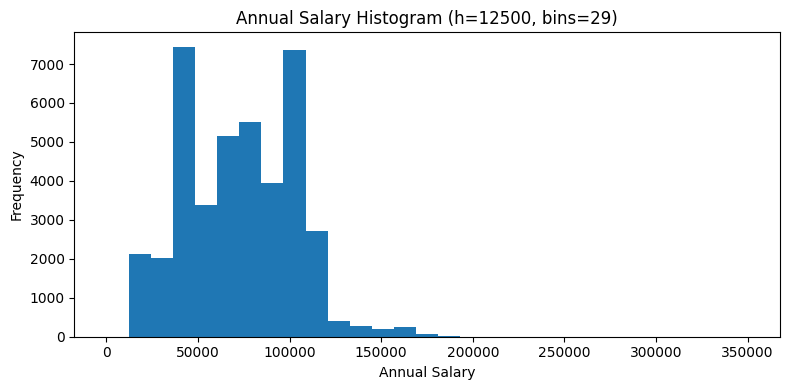

In [7]:
# Choose the optimal bin width
best_h = results_df.iloc[0]['Bin Width']
best_nbins = int(results_df.iloc[0]['Number of Bins'])

# Plot histogram with optimal bin width
plt.figure(figsize=(8, 4))
plt.hist(data, bins=best_nbins)
plt.title(f'Annual Salary Histogram (h={best_h:.0f}, bins={best_nbins})')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()